# Notebook Experimental

Dieses Notebook kann dazu verwendet werden, Code außerhalb des durch die anderen Notebooks vorgegebenen Prozesses Code zu schreiben, kleinere Hilfsfunktionen zu definieren und Code zu testen. Typische Anwendungsbeispiele sind unten aufgelistet.

In [1]:
%load_ext autoreload
%autoreload 2

---

#### Anzeigen des Intermediate Datensatzes

In [1]:
import pandas as pd

df = pd.read_feather('../data/intermediate/twitter_tweets_intermediate.feather')
df.head(4)

,url,date,rawContent
0,https://twitter.com/AgileScrumGuide/status/980...,2018-04-01 23:59:05,[ video ]\nAgile Has a Long and Colorful Herit...
1,https://twitter.com/CioAmaro/status/9805954230...,2018-04-01 23:59:02,Evidently there are no enough cyber security s...
2,https://twitter.com/MelissaOnline/status/98059...,2018-04-01 23:58:54,#Women in NYC #Tech: Sybil Steele of Temme Med...
3,https://twitter.com/DigitalKeith/status/980595...,2018-04-01 23:58:11,A great #Startup bit.ly/2rO25WL #Innovation #G...


#### Generierung der list_parameter_combinations.pkl

Die Erstellung dieser Datei ist notwenig, um das Hyperparameter Tuning für das Topic Modeling headless durchführen zu können.

In [4]:
from src.utils import safe_as_pkl

search_space = {
    'num_topics': hp.choice('num_topics', [i for i in range(12, 28)]),
    'alpha': hp.choice('alpha', ['symmetric', 'asymmetric', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
    'eta': hp.choice('eta', ['symmetric', 'auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
    'chunksize':  hp.choice('chunksize', [5000]),
    'iterations': hp.choice('iterations', [50, 100]),
    'passes': hp.choice('passes', [8, 9, 10])
}
safe_as_pkl(search_space, '../data/modeling/tm_ht_search_space.pkl')

#### Erstellen interaktives Topic Modeling

Der nachfolgende Code wird verwendet, um die interaktive HTML-Seite für das Topic-Modeling zu generieren.

In [1]:
import pyLDAvis.gensim_models
from src.utils import load_pkl

# load optimized lda model
lda_model = load_pkl('../models/optimized_lda_model_146.pkl')

# generate the interactive HTML page
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim_models.prepare(lda_model.model, lda_model.corpus, lda_model.dictionary, sort_topics=False)
pyLDAvis.save_html(vis_data, '../export/optimized_lda_visualization_146.html')

#### Erstellen barh-Charts für Häufigkeit der Schlüsselwörter innerhalb der Topics

Hier werden die barh Charts für die alternative visuelle Darstellung der Topics für die Bachelorarbeit erstellt.

C:\Users\lukas\AppData\Local\Temp\ipykernel_16224\4243641728.py:21: UserWarning: Glyph 8294 (\N{LEFT-TO-RIGHT ISOLATE}) missing from current font.
  plt.tight_layout()
C:\Users\lukas\AppData\Local\Temp\ipykernel_16224\4243641728.py:21: UserWarning: Glyph 8297 (\N{POP DIRECTIONAL ISOLATE}) missing from current font.
  plt.tight_layout()
C:\Users\lukas\AppData\Local\Temp\ipykernel_16224\4243641728.py:22: UserWarning: Glyph 8294 (\N{LEFT-TO-RIGHT ISOLATE}) missing from current font.
  plt.savefig(f'../export/tm_bchart_topic_{topic_id}.svg', format='svg')
C:\Users\lukas\AppData\Local\Temp\ipykernel_16224\4243641728.py:22: UserWarning: Glyph 8297 (\N{POP DIRECTIONAL ISOLATE}) missing from current font.
  plt.savefig(f'../export/tm_bchart_topic_{topic_id}.svg', format='svg')


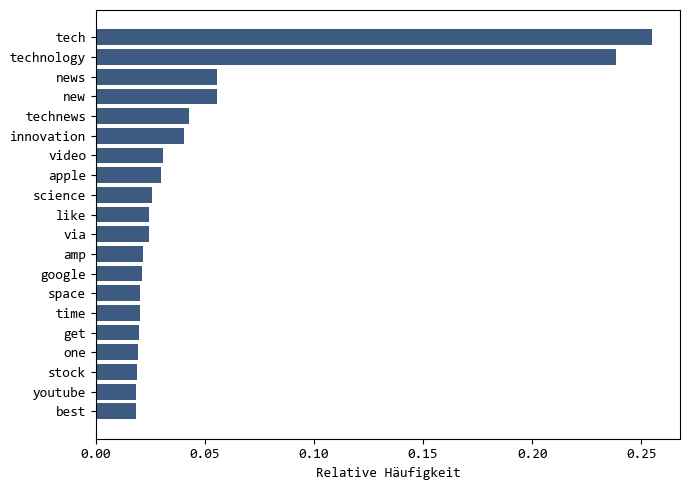

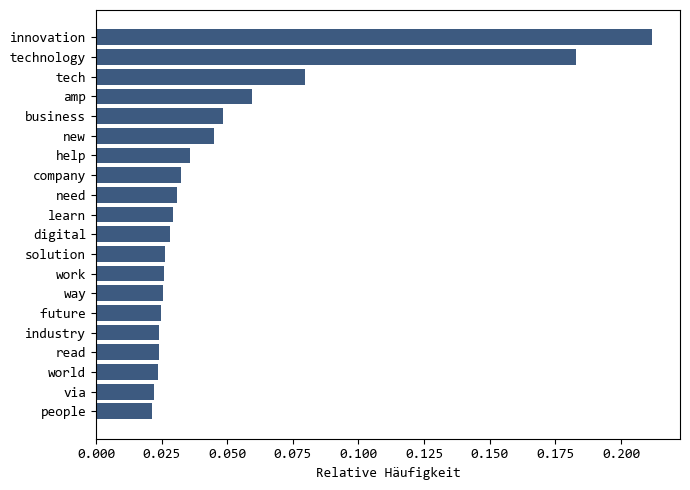

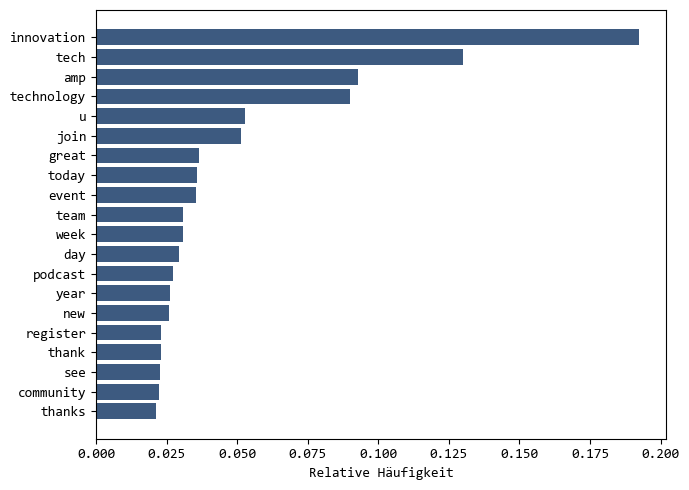

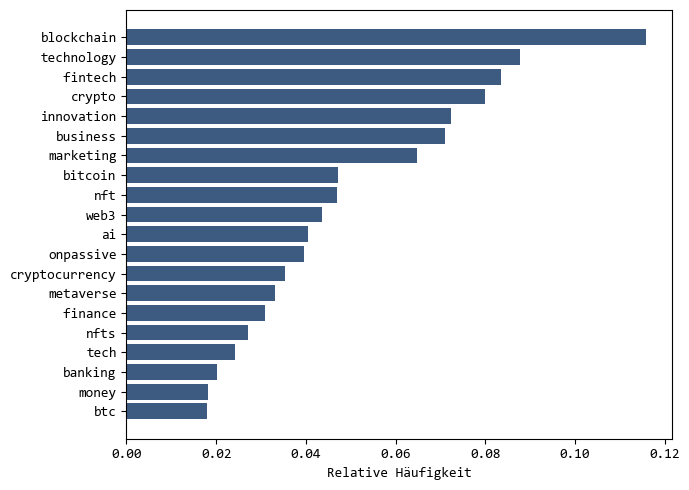

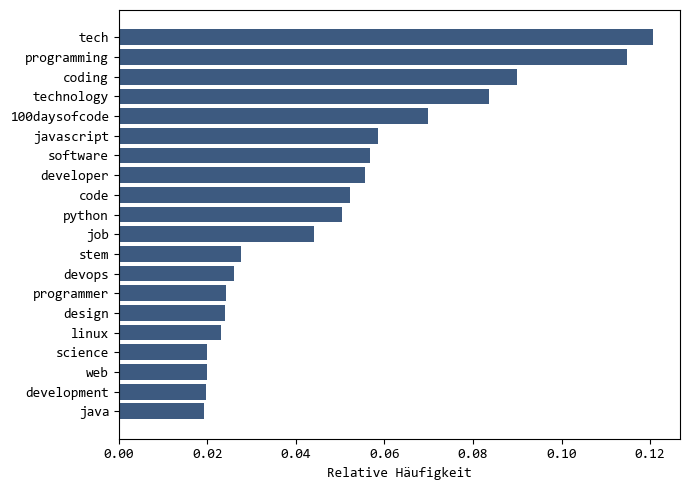

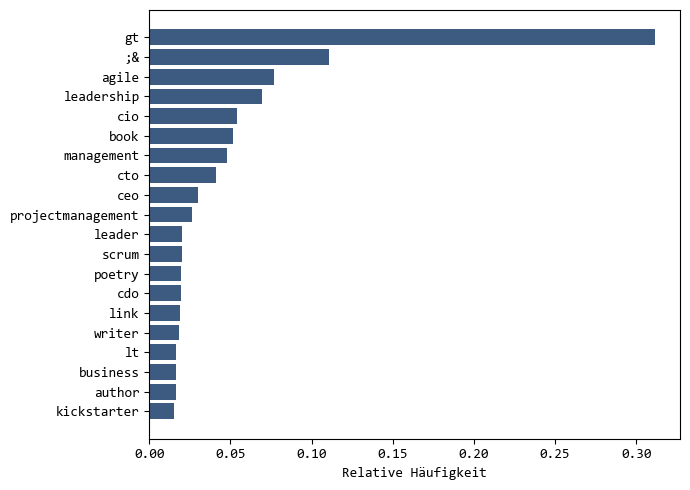

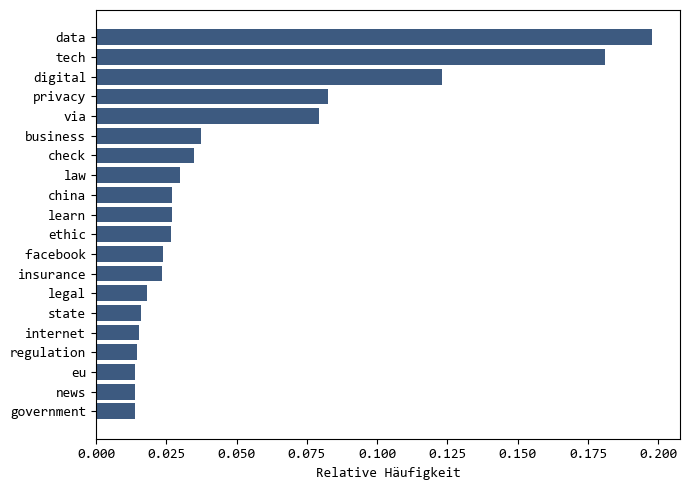

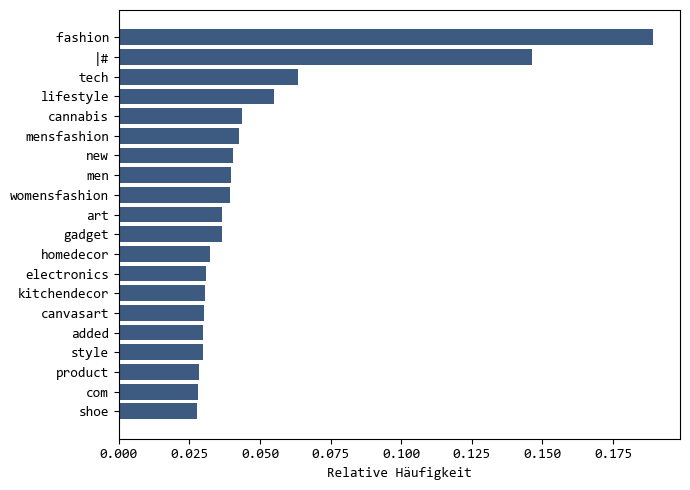

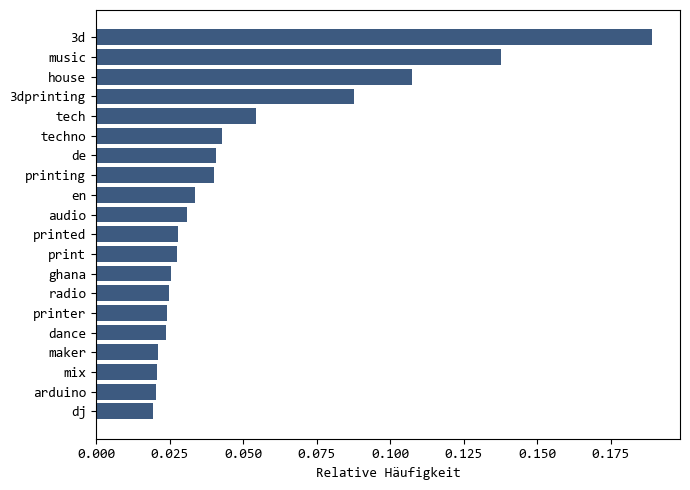

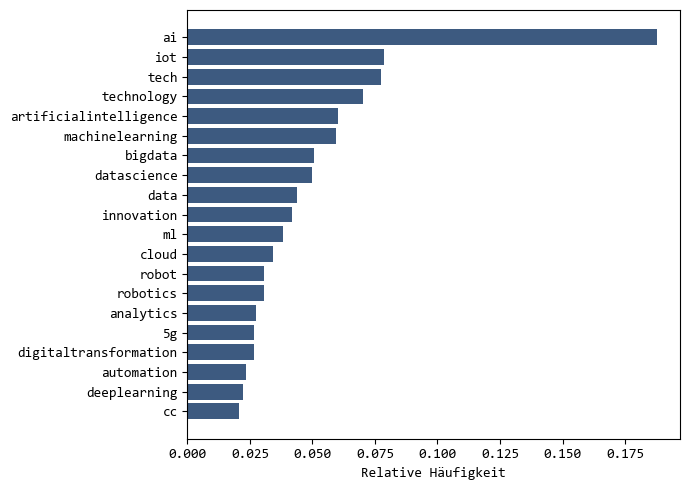

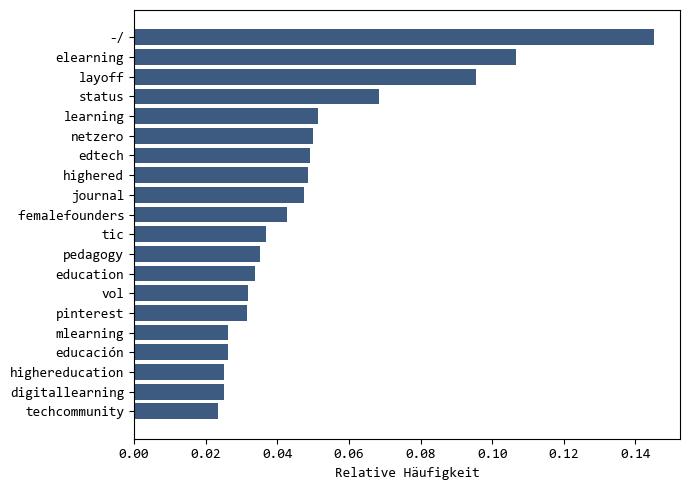

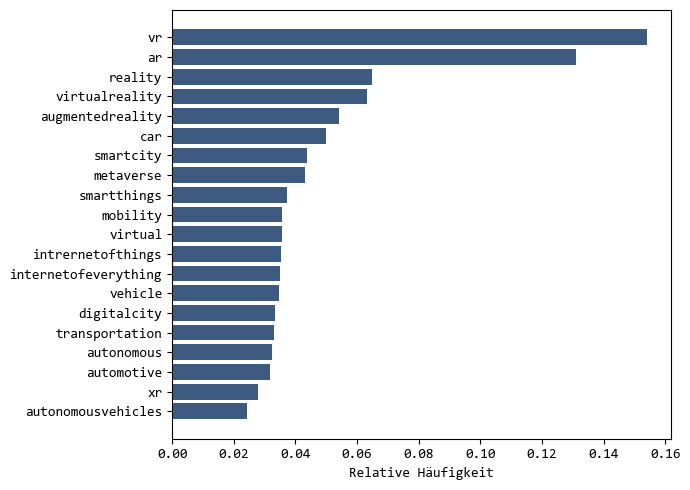

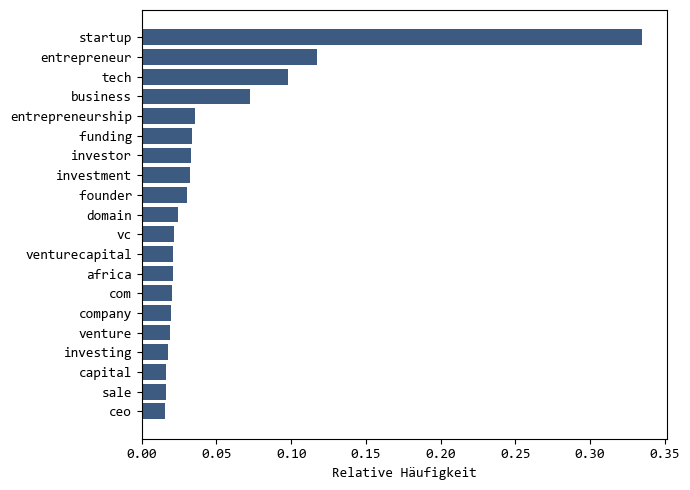

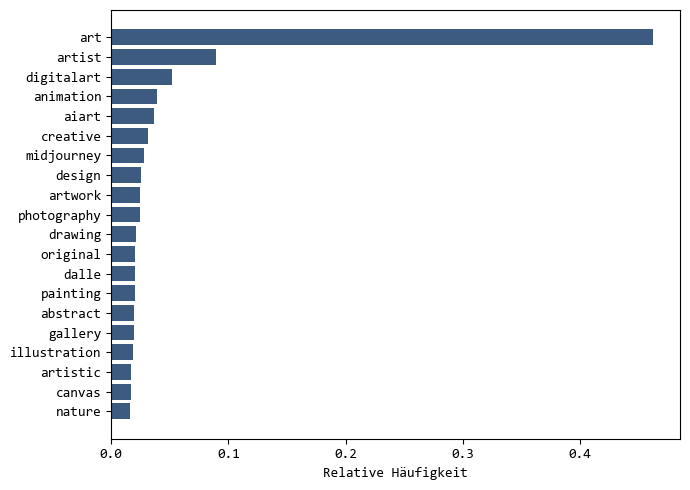

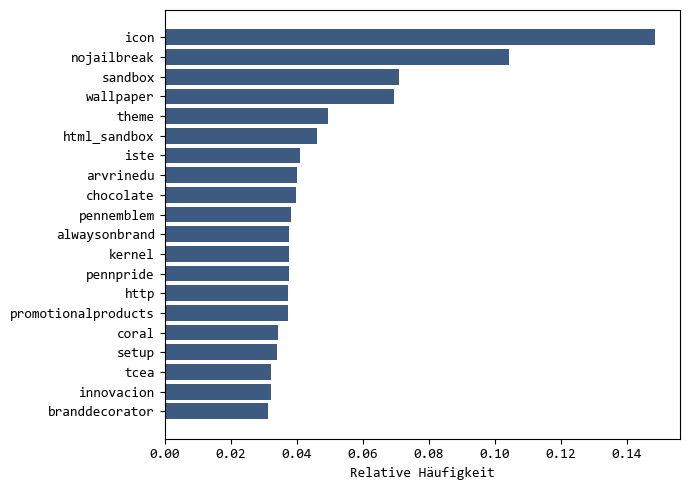

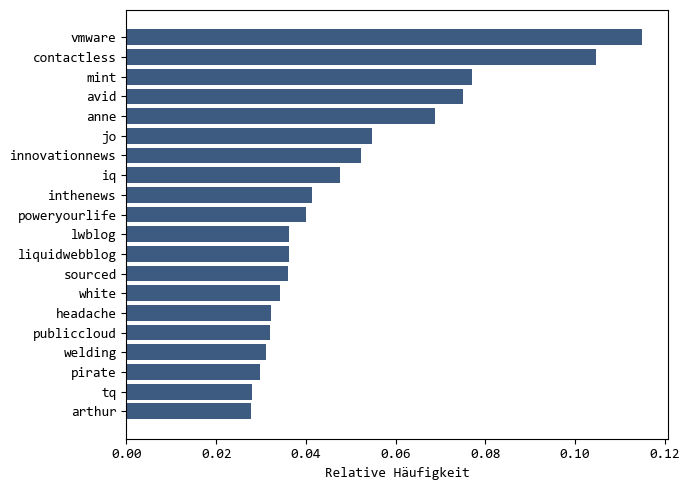

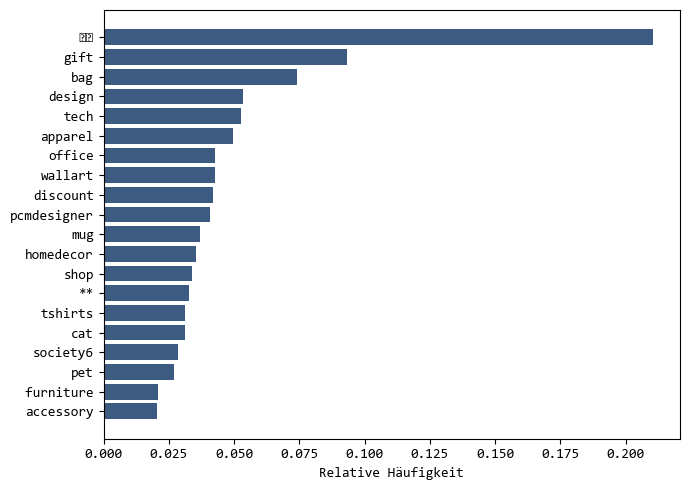

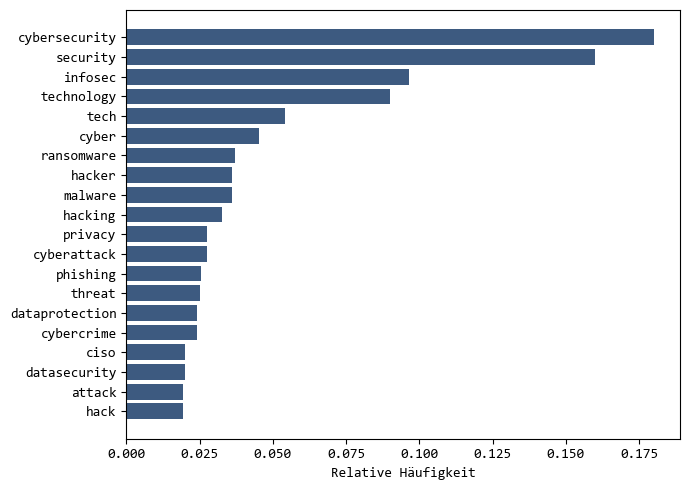

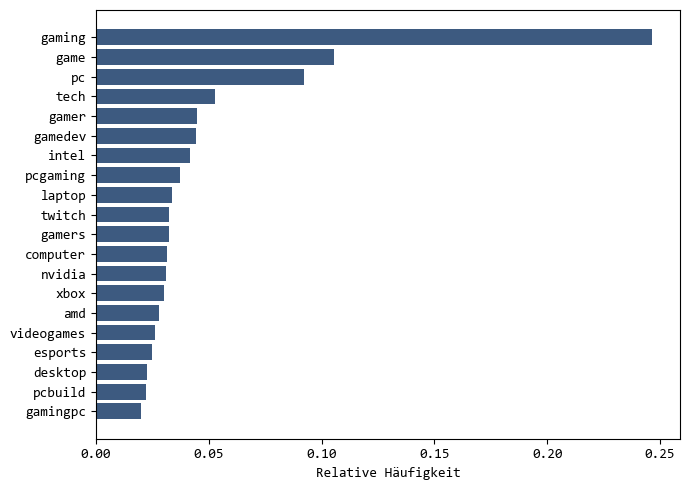

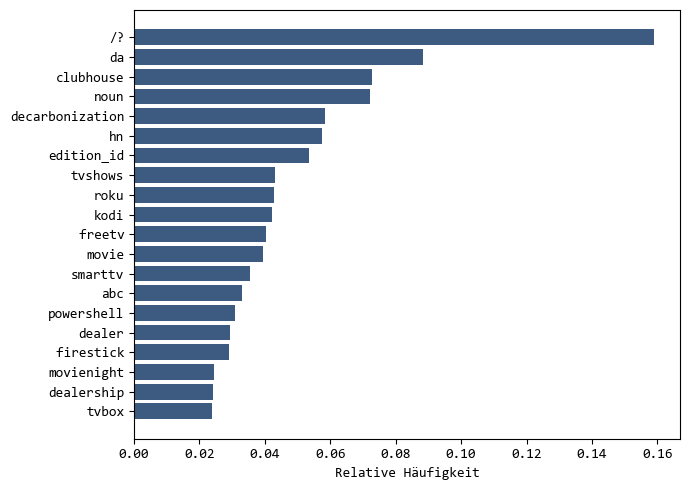

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def create_chart(topic_id:int, num_keywords:int):
    topic_keywords = lda_model.model.show_topic(topic_id-1, topn=num_keywords)
    sorted_topic_keywords = sorted(topic_keywords, key=lambda x: x[1])
    
    keywords = [keyword for keyword, weight in sorted_topic_keywords]
    weights = [weight for keyword, weight in sorted_topic_keywords]
    
    total_weight = sum(weights) # sum the weights of all keywords/terms in the topic
    relative_frequencies = [weight / total_weight for weight in weights] # calculate the relative frequency of each keyword/term
    y = np.arange(len(keywords)) # create an array for the bar positions
    
    plt.rcParams['font.family'] = 'Consolas'
    plt.figure(figsize=(7, 5)) # width, height
    plt.barh(y, relative_frequencies, color='#3d5a80')
    plt.yticks(y, keywords)
    #plt.ylabel('Schlüsselwörter')
    plt.xlabel('Relative Häufigkeit')
    plt.tight_layout()
    plt.savefig(f'../export/tm_bchart_topic_{topic_id}.svg', format='svg')
    
# load optimized lda model
lda_model = load_pkl('../models/optimized_lda_model_174.pkl')

for i in range(lda_model.model.num_topics):
    create_chart(i+1, 20)

#### Erstellen der Trendverläufe

Blockchain-Technologie
Künstliche Intelligenz
VR, AR und Metaverse
Cybersicherheit


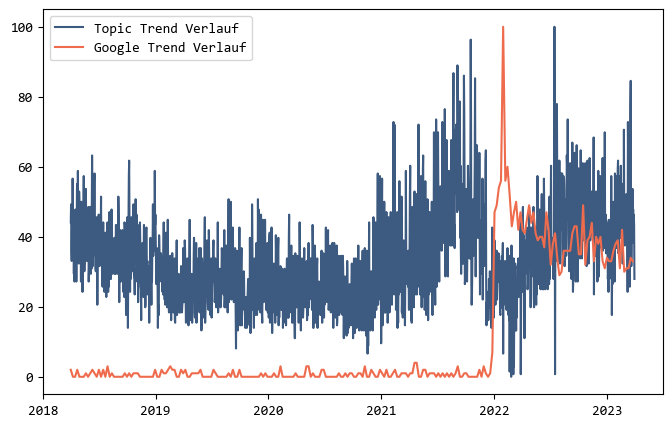

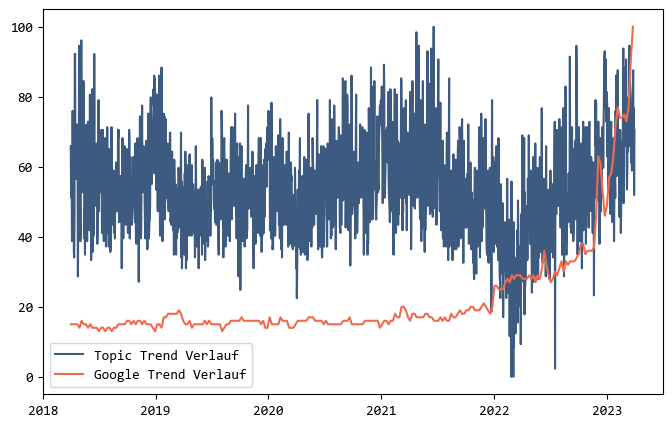

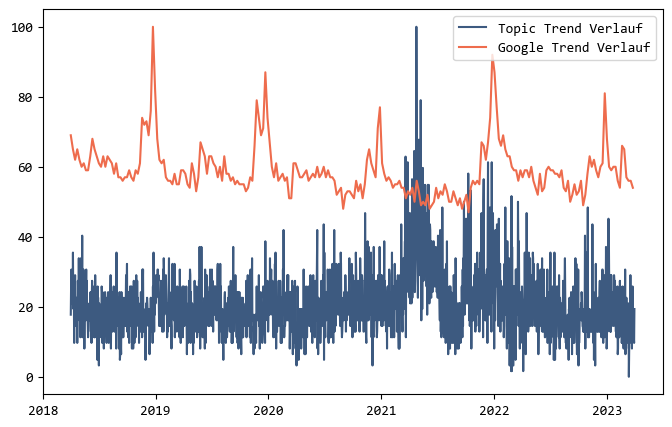

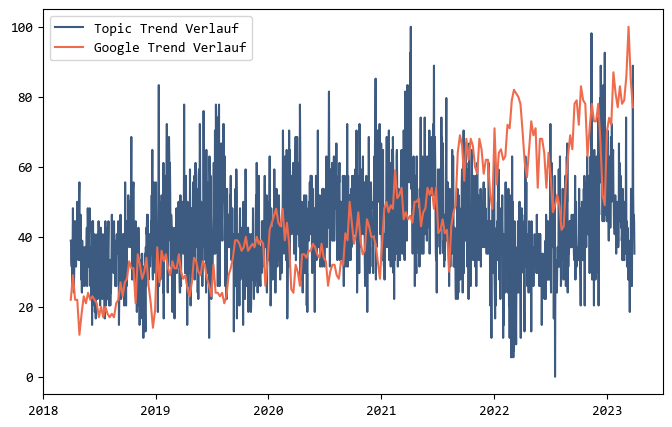

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import load_pkl

google_trends_data = {
    'Blockchain-Technologie': pd.read_csv('../data/modeling/google_trends_data_blockchain.csv', skiprows=2),
    'Künstliche Intelligenz': pd.read_csv('../data/modeling/google_trends_data_ai.csv', skiprows=2),
    'VR, AR und Metaverse': pd.read_csv('../data/modeling/google_trends_data_vr_ar_metaverse.csv', skiprows=2),
    'Cybersicherheit': pd.read_csv('../data/modeling/google_trends_data_cybersecurity.csv', skiprows=2)
}

xgb_models = load_pkl('../models/xgb_models.pkl')
for xgb_model in xgb_models:
    gtd = google_trends_data[xgb_model.label]
    gtd['Woche'] = pd.to_datetime(gtd['Woche'])
    gtd.set_index('Woche', inplace=True)
    
    plt.rcParams['font.family'] = 'Consolas'
    plt.figure(figsize=(8, 5)) # width, height
    
    plt.plot(xgb_model.data, label='Topic Trend Verlauf', color='#3d5a80')
    plt.plot(gtd, label='Google Trend Verlauf', color='#ee6c4d')
    plt.legend()
    
    plt.savefig(f'../export/trend_lchart_{xgb_model.id}.svg', format='svg') 

---